## EDA

### 第1步：导入库并加载数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 设置绘图风格和中文字体，以便图表能正确显示
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei'] # Windows系统下使用黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

In [3]:
# 加载数据
try:
    train_df = pd.read_csv('../data/train.csv')
    test_df = pd.read_csv('../data/test.csv')
    sample_submission_df = pd.read_csv('../data/sample_submission.csv')
except FileNotFoundError:
    print("请确保 train.csv, test.csv 和 sample_submission.csv 文件在 'data' 目录下")

In [4]:
# 显示训练数据的前5行，快速了解数据结构
print("训练集预览:")
train_df.head(5)

训练集预览:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


### 第2步：数据概览

In [5]:
print("训练集信息概览:")
train_df.info()

print("\n--------------------\n")

print("数值特征的描述性统计:")
print(train_df.describe())

训练集信息概览:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB

--------------------

数值特征的描述性统计:
                 id  Time_spent_Alone  Social_event_attendance  Going_outside  \
count  18524.000000      17334.000000             17344.000000   17058.000000   
mean    

### 第3步：分析目标变量 `Personality`

C:\Users\wjw20\AppData\Local\Temp\ipykernel_20660\3544905304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personality', data=train_df, palette=['#4374B3', '#FF8C00'])


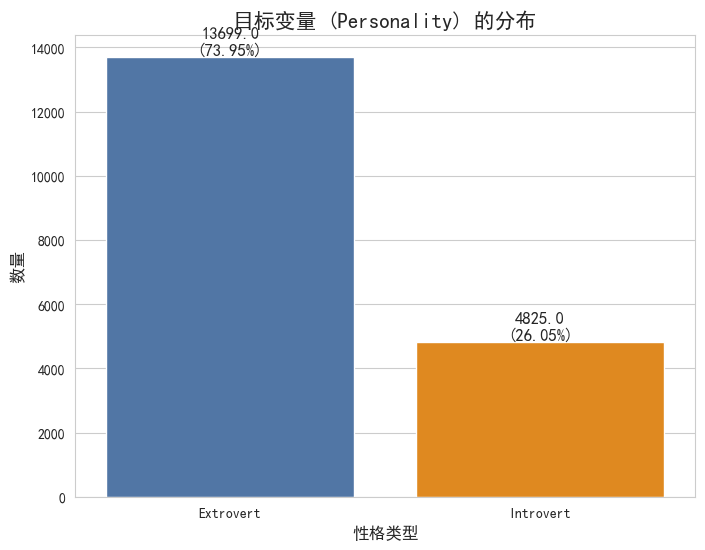

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Personality', data=train_df, palette=['#4374B3', '#FF8C00'])
plt.title('目标变量 (Personality) 的分布', fontsize=15)
plt.xlabel('性格类型', fontsize=12)
plt.ylabel('数量', fontsize=12)

# 计算并打印具体比例
total = len(train_df)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            f'{height}\n({height/total:.2%})',
            ha="center", va='bottom', fontsize=12)
plt.show()

### 第4步：分析数值特征

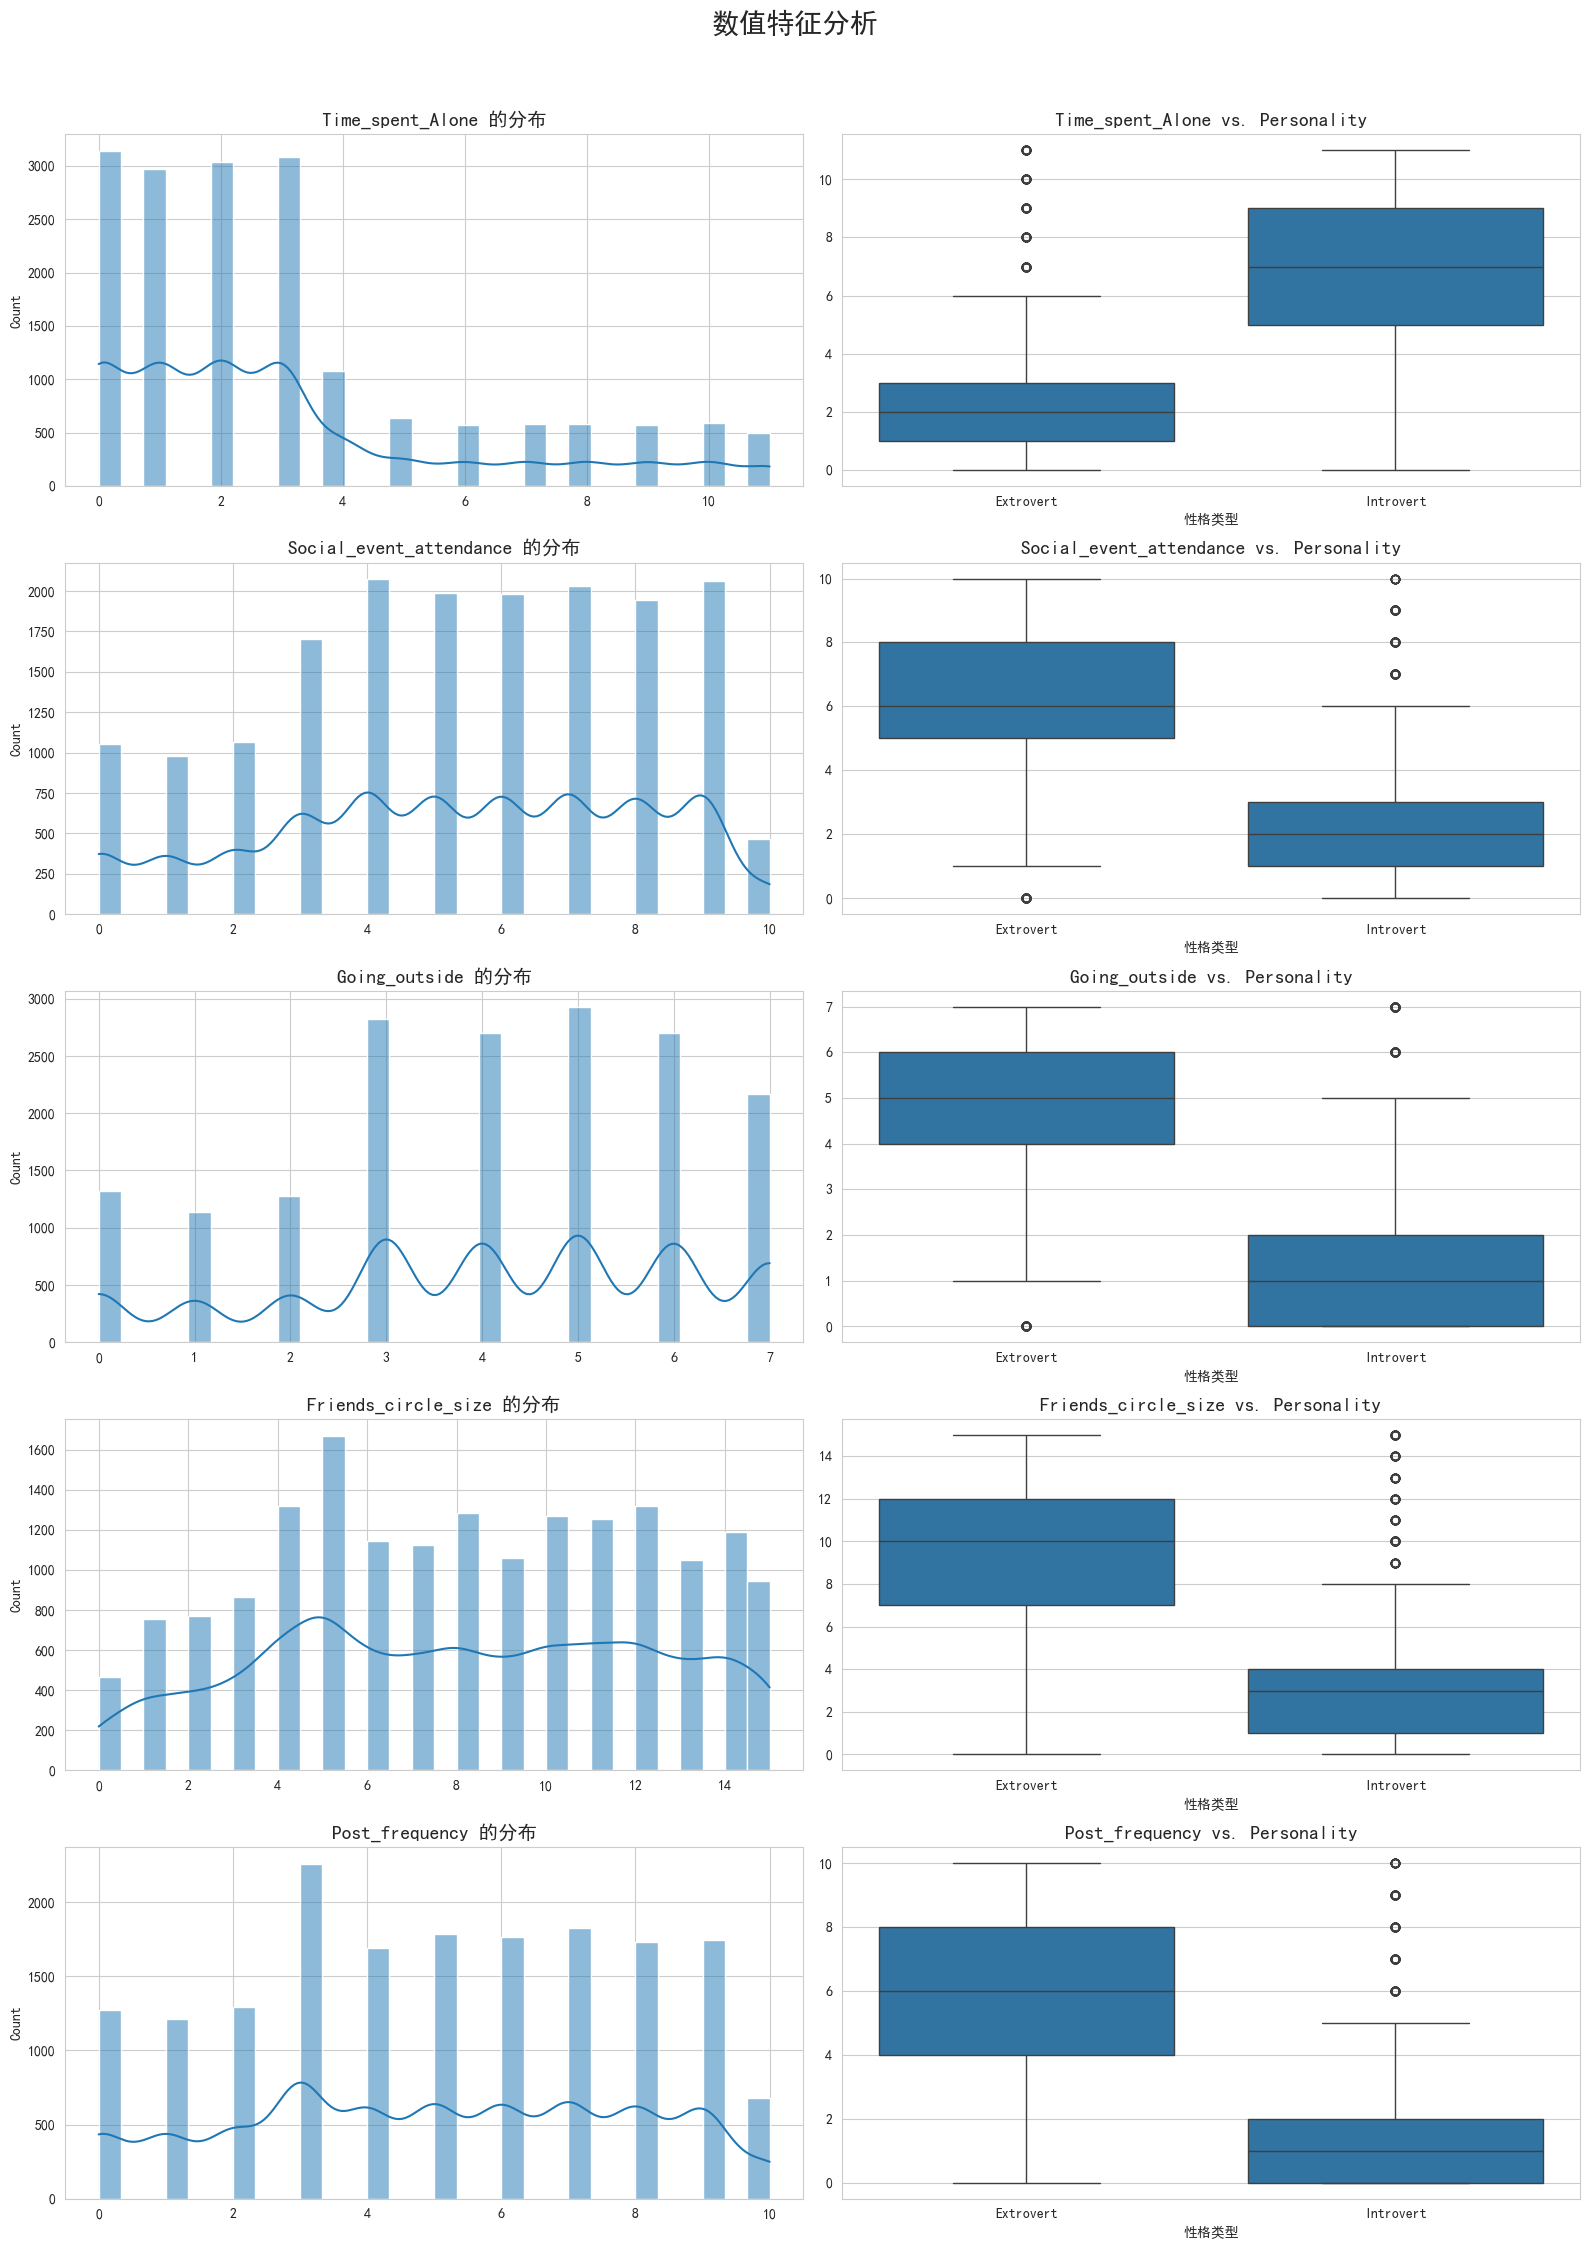

In [7]:
# 定义数值特征列
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 22))
fig.suptitle('数值特征分析', fontsize=20, y=1.02)

for i, feature in enumerate(numerical_features):
    # 1. 绘制分布直方图和核密度图 (KDE)
    sns.histplot(data=train_df, x=feature, kde=True, ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'{feature} 的分布', fontsize=14)
    axes[i, 0].set_xlabel('')
    
    # 2. 绘制箱形图，对比不同性格类型下的特征分布
    sns.boxplot(data=train_df, x='Personality', y=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs. Personality', fontsize=14)
    axes[i, 1].set_xlabel('性格类型')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

### 第5步：分析类别特征

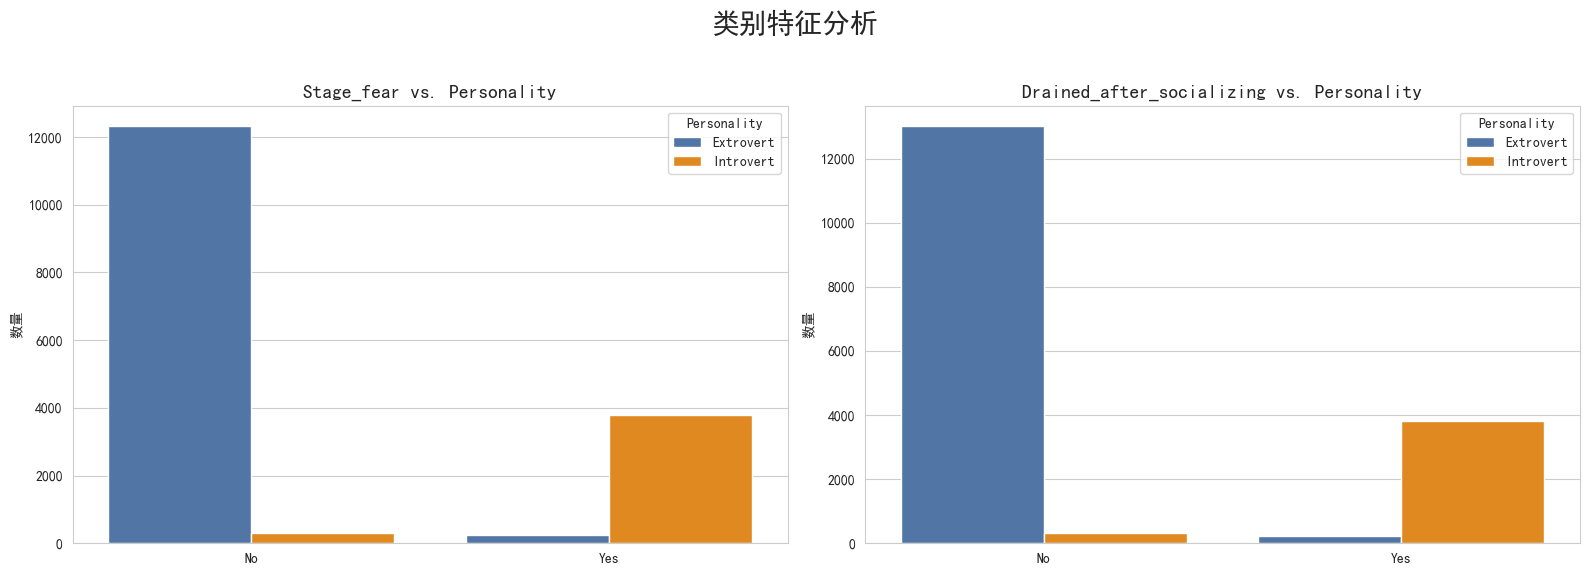

In [8]:
# 定义类别特征
categorical_features = ['Stage_fear', 'Drained_after_socializing']

fig, axes = plt.subplots(1, len(categorical_features), figsize=(16, 6))
fig.suptitle('类别特征分析', fontsize=20)

for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_df, x=feature, hue='Personality', ax=axes[i], palette=['#4374B3', '#FF8C00'])
    axes[i].set_title(f'{feature} vs. Personality', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('数量')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 第6步：缺失值分析

训练集中各特征的缺失值情况:
                           缺失数量      缺失百分比
Stage_fear                 1893  10.219175
Going_outside              1466   7.914057
Post_frequency             1264   6.823580
Time_spent_Alone           1190   6.424098
Social_event_attendance    1180   6.370114
Drained_after_socializing  1149   6.202764
Friends_circle_size        1054   5.689916


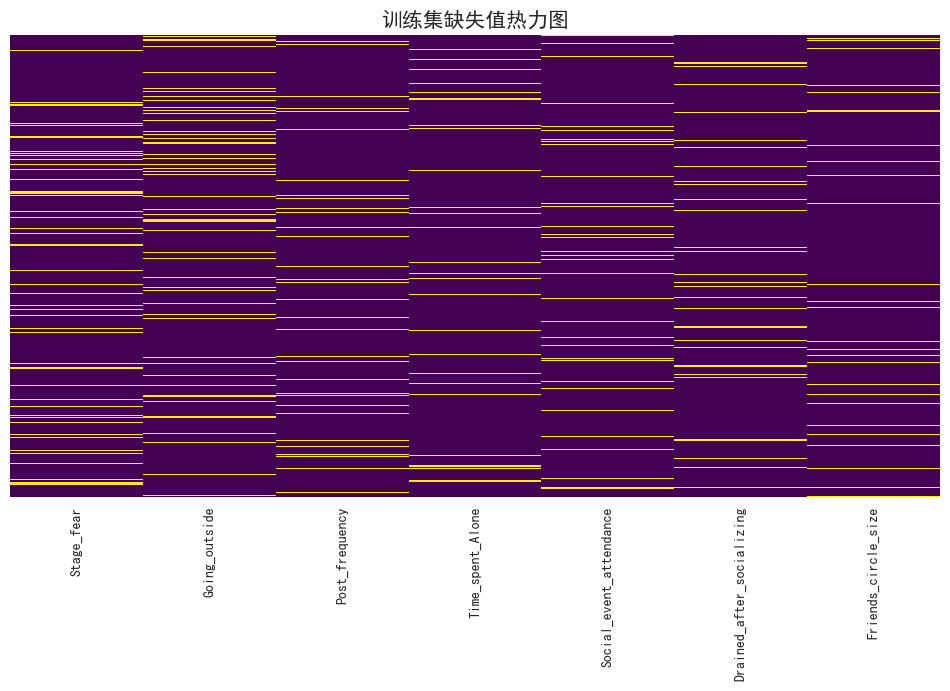

In [9]:
# 计算并可视化缺失值
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'缺失数量': missing_values, '缺失百分比': missing_percentage})

# 筛选出有缺失值的列并排序
missing_info = missing_info[missing_info['缺失数量'] > 0].sort_values(by='缺失数量', ascending=False)

print("训练集中各特征的缺失值情况:")
print(missing_info)

# 使用热力图可视化缺失值的位置
if not missing_info.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(train_df[missing_info.index].isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('训练集缺失值热力图', fontsize=15)
    plt.show()

### 第7步：相关性分析

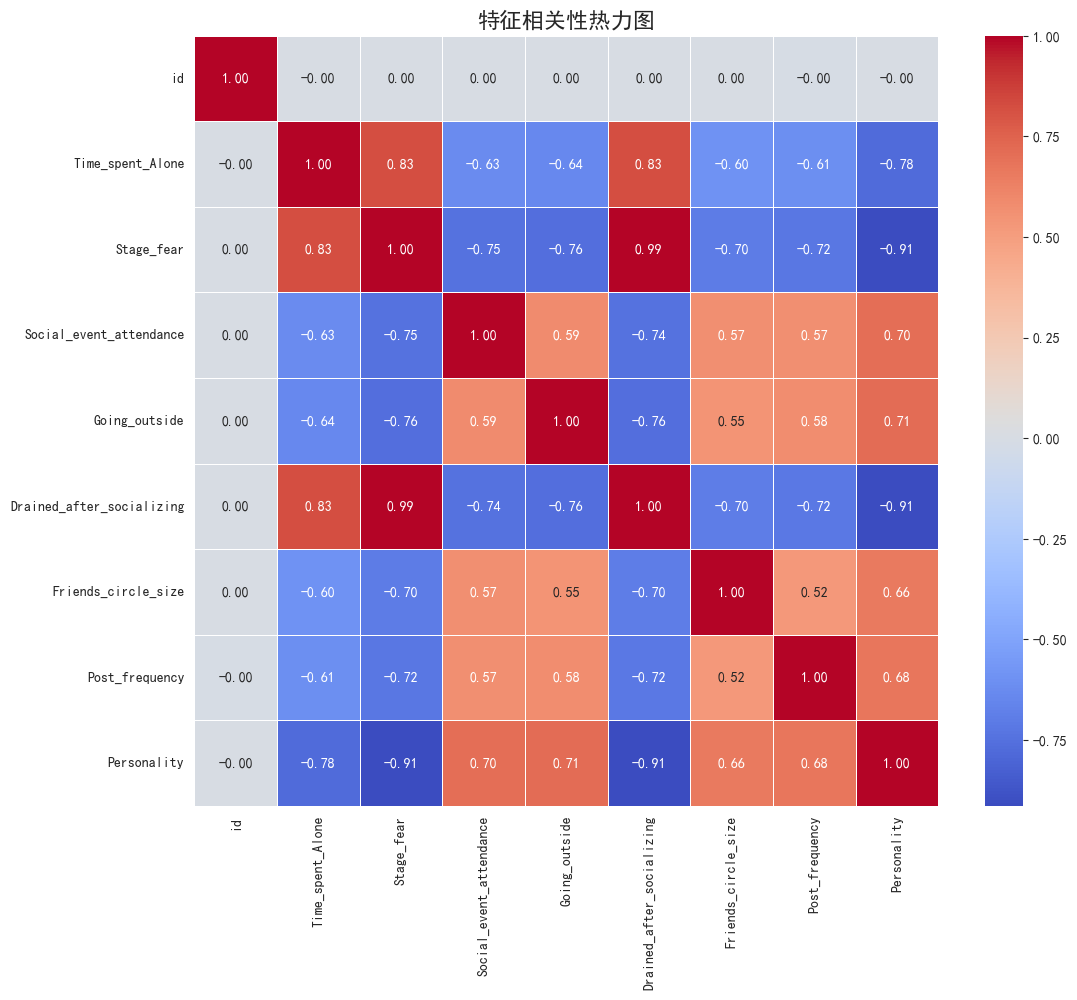

In [10]:
# 为了计算相关性，需要先将类别特征和目标变量进行数值编码
df_corr = train_df.copy()

# 编码 'Yes'/'No' 和 'Extrovert'/'Introvert'
# 这里使用简单的映射，更稳健的方法是使用 scikit-learn 的 LabelEncoder
# 但为了EDA，这样做更直观
df_corr['Personality'] = df_corr['Personality'].map({'Extrovert': 1, 'Introvert': 0})
df_corr['Stage_fear'] = df_corr['Stage_fear'].map({'Yes': 1, 'No': 0})
df_corr['Drained_after_socializing'] = df_corr['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# 计算相关性矩阵
correlation_matrix = df_corr.corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('特征相关性热力图', fontsize=16)
plt.show()

### EDA 结论

1. 除了 `id` 和目标变量 `Personality`，所有特征都存在缺失值，缺失比例在 6% 到 8% 之间。缺失值热力图显示这些缺失是分散的，没有明显的行或列模式。
    - 缺失值处理是本次任务的核心挑战之一。一个稳健的填充策略对于模型性能至关重要。
2. 数据集存在明显的类别不平衡。外向者 (Extrovert) 约占 74%，而内向者 (Introvert) 仅占 26%。
    - 在模型训练和评估时必须考虑这一点。我们需要使用分层抽样 (Stratified Sampling) 来保证训练和验证集中类别比例的一致性，并且评估指标应选择对不平衡数据不敏感的 AUC-ROC（竞赛也要求如此）。
3. 所有特征都与目标变量 `Personality` 表现出极强的相关性。
    - 内向者 (`Introvert`) 倾向于：花更多时间独处 (`Time_spent_Alone` ↑)，有舞台恐惧 (`Stage_fear` = Yes)，社交后感到疲惫 (`Drained_after_socializing` = Yes)。
    - 外向者 (`Extrovert`) 倾向于：更频繁地参加社交活动 (`Social_event_attendance` ↑)，更常外出 (`Going_outside` ↑)，有更大的朋友圈 (`Friends_circle_size` ↑)，发帖更频繁 (`Post_frequency` ↑)。
    - 这些特征的区分度非常高，预示着模型应该能达到不错的预测效果。
4. `Stage_fear` 和 `Drained_after_socializing` 之间的相关性高达 0.99，几乎是线性相关的。这说明它们可能在衡量同一个潜在特质。此外，`Time_spent_Alone` 也与这两个特征高度相关。
    - 对于像 LightGBM 或 XGBoost 这样的树模型，多重共线性不是一个大问题。但这个发现很有趣，说明模型的预测可能主要依赖于这几个强相关的特征。

## 构建训练流程

### 第1步：数据预处理与特征工程

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import lightgbm as lgb

In [12]:
# --- 1. 分离特征和目标变量 ---
X = train_df.drop(['id', 'Personality'], axis=1)
y = train_df['Personality']

# 对目标变量进行标签编码 (Extrovert=1, Introvert=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# 查看编码结果，确保 'Extrovert' 对应 1
print(f"标签编码对应关系: {le.classes_} -> {le.transform(le.classes_)}")

标签编码对应关系: ['Extrovert' 'Introvert'] -> [0 1]


In [13]:
# --- 2. 识别不同类型的特征 ---
# 原始的类别特征
categorical_features_raw = ['Stage_fear', 'Drained_after_socializing']
# 所有的数值特征
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

In [14]:
# --- 3. 编码原始的类别特征 ---
# 先将 Yes/No 转换成 1/0，才能进行后续的缺失值填充
for col in categorical_features_raw:
    X[col] = X[col].map({'Yes': 1, 'No': 0})
    # 同时对测试集做相同处理
    test_df[col] = test_df[col].map({'Yes': 1, 'No': 0})

In [15]:
# --- 4. 构建预处理 Pipeline ---
# 对所有特征（现在都是数值类型了）进行缺失值填充和标准化

# 创建一个预处理器
# Pipeline步骤:
# 1. KNNImputer: 使用 K-近邻算法填充缺失值，比简单的均值/中位数更优
# 2. StandardScaler: 对所有特征进行标准化，这对某些模型很重要
preprocessor = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)), # 使用5个最近邻来填充缺失值
    ('scaler', StandardScaler())
])

# 此时，我们的 X 和 test_df 中的类别特征已经手动转为数值
# 所有列都可以应用这个预处理器
all_features = numerical_features + categorical_features_raw

# ColumnTransformer 可以将预处理器应用到指定的列上
# 在这里，我们应用到所有特征列
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num_cat', preprocessor, all_features)
    ],
    remainder='passthrough' # 其他没有指定的列（这里没有）将保持原样
)

print("\n预处理流程构建完成!")


预处理流程构建完成!


### 第2步：使用交叉验证训练 LightGBM 模型

In [16]:
# --- 1. 定义模型 ---
# 使用 LightGBM 分类器，它性能强大且高效
lgbm = lgb.LGBMClassifier(objective='binary', 
                          metric='auc',
                          random_state=42)

In [17]:
# --- 2. 将预处理器和模型组合成一个完整的 Pipeline ---
model_pipeline = Pipeline(steps=[
    ('preprocessor', full_preprocessor),
    ('classifier', lgbm)
])

In [18]:
# --- 3. 设置交叉验证 ---
# 使用分层 K 折交叉验证，因为我们的数据集不平衡
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

In [19]:
# --- 4. 执行交叉验证训练 ---
print(f"\n开始进行 {N_SPLITS}-折交叉验证训练...")
oof_preds = np.zeros((len(train_df), 1))
test_preds = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_encoded)):
    print(f"--- 第 {fold+1} 折 ---")
    
    # 划分训练集和验证集
    X_train, y_train = X.iloc[train_idx], y_encoded[train_idx]
    X_val, y_val = X.iloc[val_idx], y_encoded[val_idx]
    
    # 训练模型
    model_pipeline.fit(X_train, y_train)
    
    # 在验证集上进行预测（预测概率）
    val_preds = model_pipeline.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds.reshape(-1, 1)
    
    # 在测试集上进行预测
    fold_test_preds = model_pipeline.predict_proba(test_df.drop('id', axis=1))[:, 1]
    test_preds.append(fold_test_preds)

# 计算 OOF (Out-of-Fold) 的 AUC 分数
from sklearn.metrics import roc_auc_score
oof_auc = roc_auc_score(y_encoded, oof_preds)
print(f"\n交叉验证完成！")
print(f"OOF AUC 分数: {oof_auc:.5f}")

# 对测试集的预测结果取平均
avg_test_preds = np.mean(test_preds, axis=0)


开始进行 5-折交叉验证训练...
--- 第 1 折 ---
[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260476 -> initscore=-1.043494
[LightGBM] [Info] Start training from score -1.043494


c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- 第 2 折 ---
[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260476 -> initscore=-1.043494
[LightGBM] [Info] Start training from score -1.043494


c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- 第 3 折 ---
[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260476 -> initscore=-1.043494
[LightGBM] [Info] Start training from score -1.043494


c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- 第 4 折 ---
[LightGBM] [Info] Number of positive: 3860, number of negative: 10959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260476 -> initscore=-1.043494
[LightGBM] [Info] Start training from score -1.043494


c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- 第 5 折 ---
[LightGBM] [Info] Number of positive: 3860, number of negative: 10960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 14820, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260459 -> initscore=-1.043585
[LightGBM] [Info] Start training from score -1.043585


c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



交叉验证完成！
OOF AUC 分数: 0.96700


c:\Users\wjw20\.conda\envs\KaggleCompetition\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### 第3步：生成提交文件

In [21]:
# --- 生成提交文件 ---
submission_df = pd.DataFrame({'id': test_df['id'], 'Personality': avg_test_preds})

# 将预测结果映射回 "Extrovert" 和 "Introvert"
# 注意：predict_proba 预测的是类别 1 (Extrovert) 的概率
# 这里竞赛通常要求提交概率值，但我们也可以生成类别标签的提交
# 根据 sample_submission.csv 的格式，看起来是需要类别
# 我们以0.5为阈值，但这不一定是最佳阈值
submission_df['Personality'] = np.where(submission_df['Personality'] > 0.5, 'Extrovert', 'Introvert')


# 为了符合 sample_submission 的格式，我们需要的是类别
# 但在Kaggle提交时，通常是提交类别1的概率
# 这里我先按概率提交，如果要求是类别，再做转换
# submission_df_prob = pd.DataFrame({'id': test_df['id'], 'Personality': avg_test_preds})
submission_df.to_csv('../res/baseline_submission.csv', index=False, encoding='utf-8-sig')

print("\n提交文件已生成！")
submission_df.head()


提交文件已生成！


,id,Personality
0,18524,Introvert
1,18525,Extrovert
2,18526,Introvert
3,18527,Introvert
4,18528,Extrovert
